## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import cloudpickle

## Loading Data

In [3]:
df = pd.read_csv('/content/steel_industry_co2.csv')

## EDA

In [4]:
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_Emission,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01-01-2023 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01-01-2023 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01-01-2023 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01-01-2023 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01-01-2023 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2_Emission                          35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [6]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_Emission,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736
std,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000
75%,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [7]:
df.shape

(35041, 11)

In [8]:
df.isnull().sum()

,0
Date_Time,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2_Emission,0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_Of_Week,0


In [9]:
# Splitting Date and Time from Date_Time column
df[['Date', 'Time']] = df['Date_Time'].str.split(' ', expand=True)
df.head(2)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_Emission,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type,Date,Time
0,01-01-2023 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,01-01-2023,00:15
1,01-01-2023 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,01-01-2023,00:30


In [10]:
df=df.drop(columns=['Date_Time'])

In [11]:
# Converting Date and Time into desired data type
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Time'] = df['Time'].dt.time

In [12]:
print(df.dtypes)

Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2_Emission                                   float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_Of_Week                                     object
Load_Type                                       object
Date                                    datetime64[ns]
Time                                            object
dtype: object


In [13]:
# Selecting numeric columns
num_cols=df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2_Emission',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'],
      dtype='object')

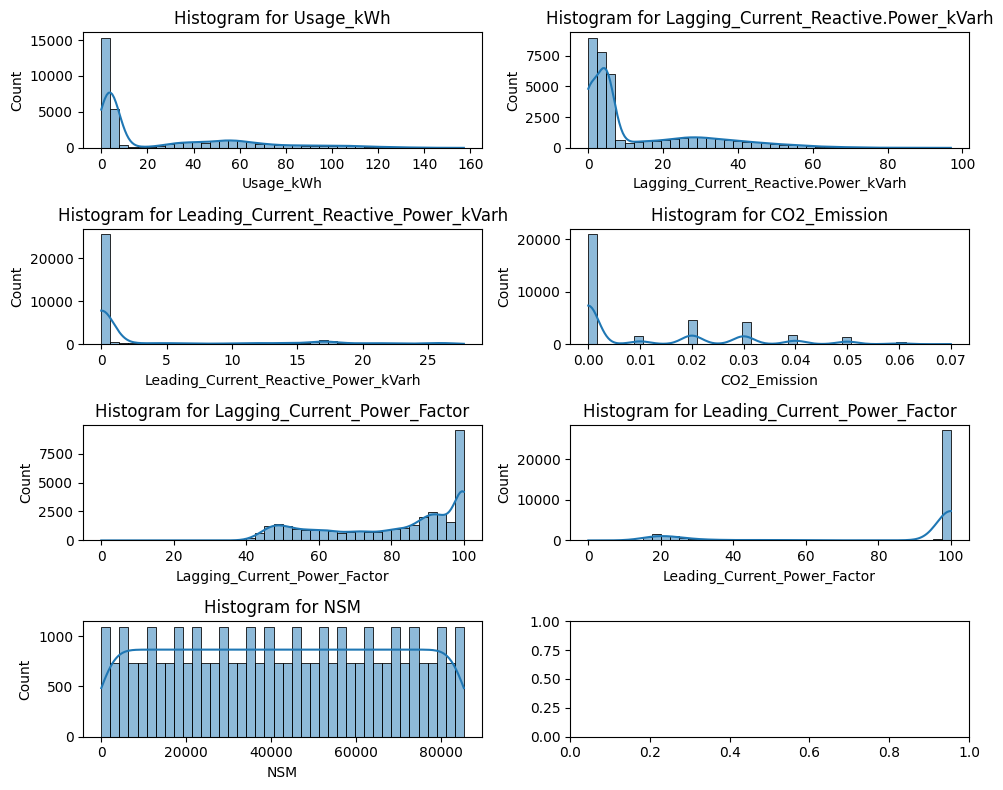

In [14]:
# Plot Histogram for Numerical columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], ax=ax, bins=40, kde=True)  # KDE for kernel density estimation
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

- NSM: It show uniform distribution.
- Usage_kWh, Lagging_Current_Reactive.Power_kVarh, Leading_Current_Reactive_Power_kVarh: It shows right skewed distribution.
- Lagging_Current_Power_Factor, Leading_Current_Power_Factor: It shows left skewed distribution.

In [15]:
# Selecting categorical columns
cate_cols=df.select_dtypes(include=['object']).columns
cate_cols

Index(['WeekStatus', 'Day_Of_Week', 'Load_Type', 'Time'], dtype='object')

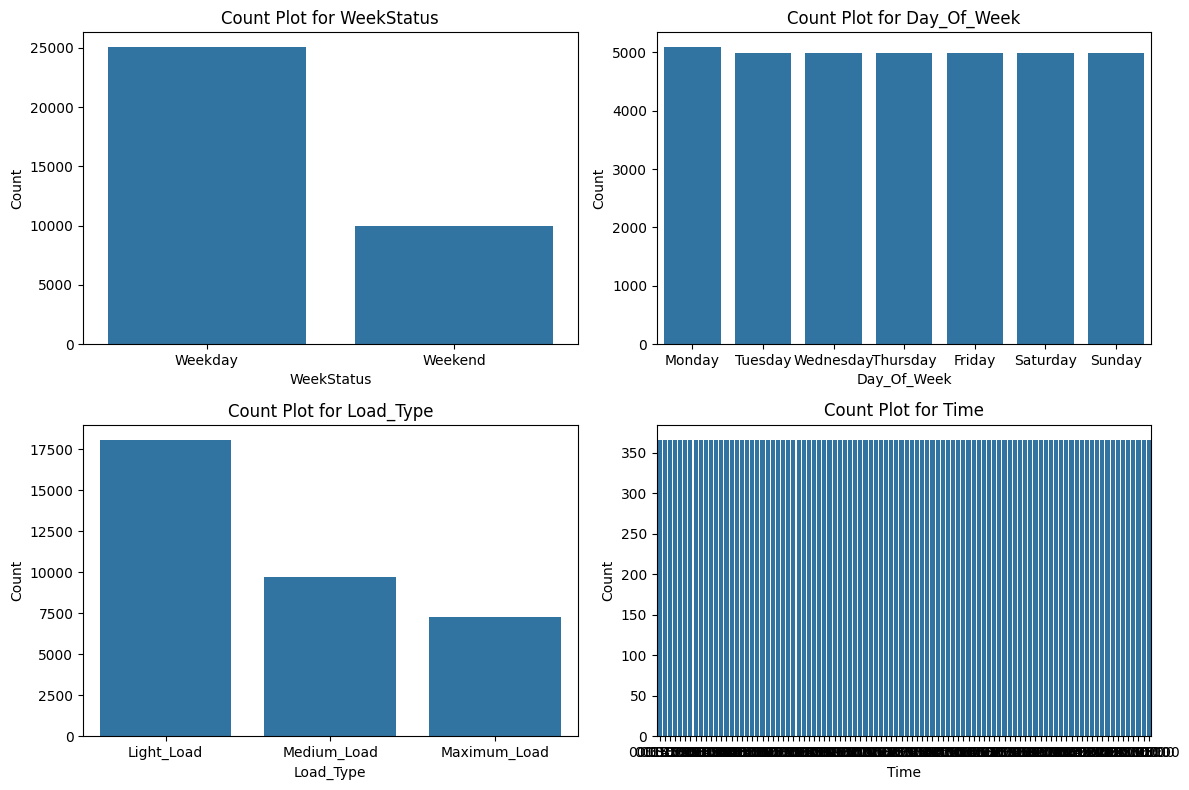

In [16]:
# Plot Countplot for Categorical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for ax, col in zip(axes, cate_cols):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

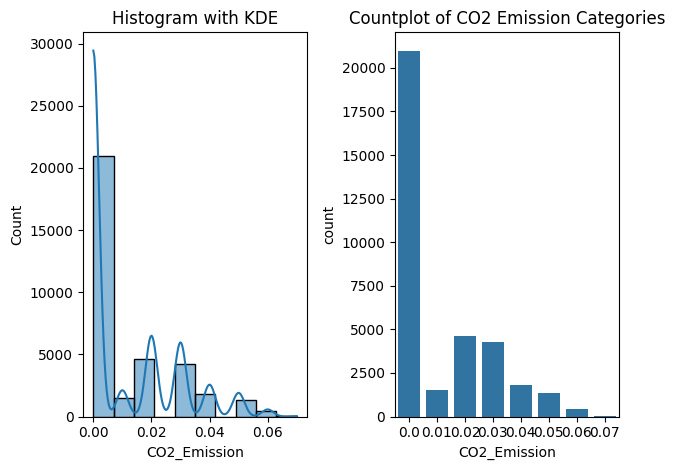

In [17]:
# Plot histogram for target variable
plt.subplot(1, 2, 1)  # First plot in a 1x2 grid
sns.histplot(df['CO2_Emission'], kde=True, bins=10)  # Change bins based on your data
plt.title('Histogram with KDE')

# Plot countplot for target variable
plt.subplot(1, 2, 2)  # Second plot in a 1x2 grid
sns.countplot(x='CO2_Emission', data=df)  # Use the categorized version if it's treated as categorical
plt.title('Countplot of CO2 Emission Categories')
plt.tight_layout()
plt.show()

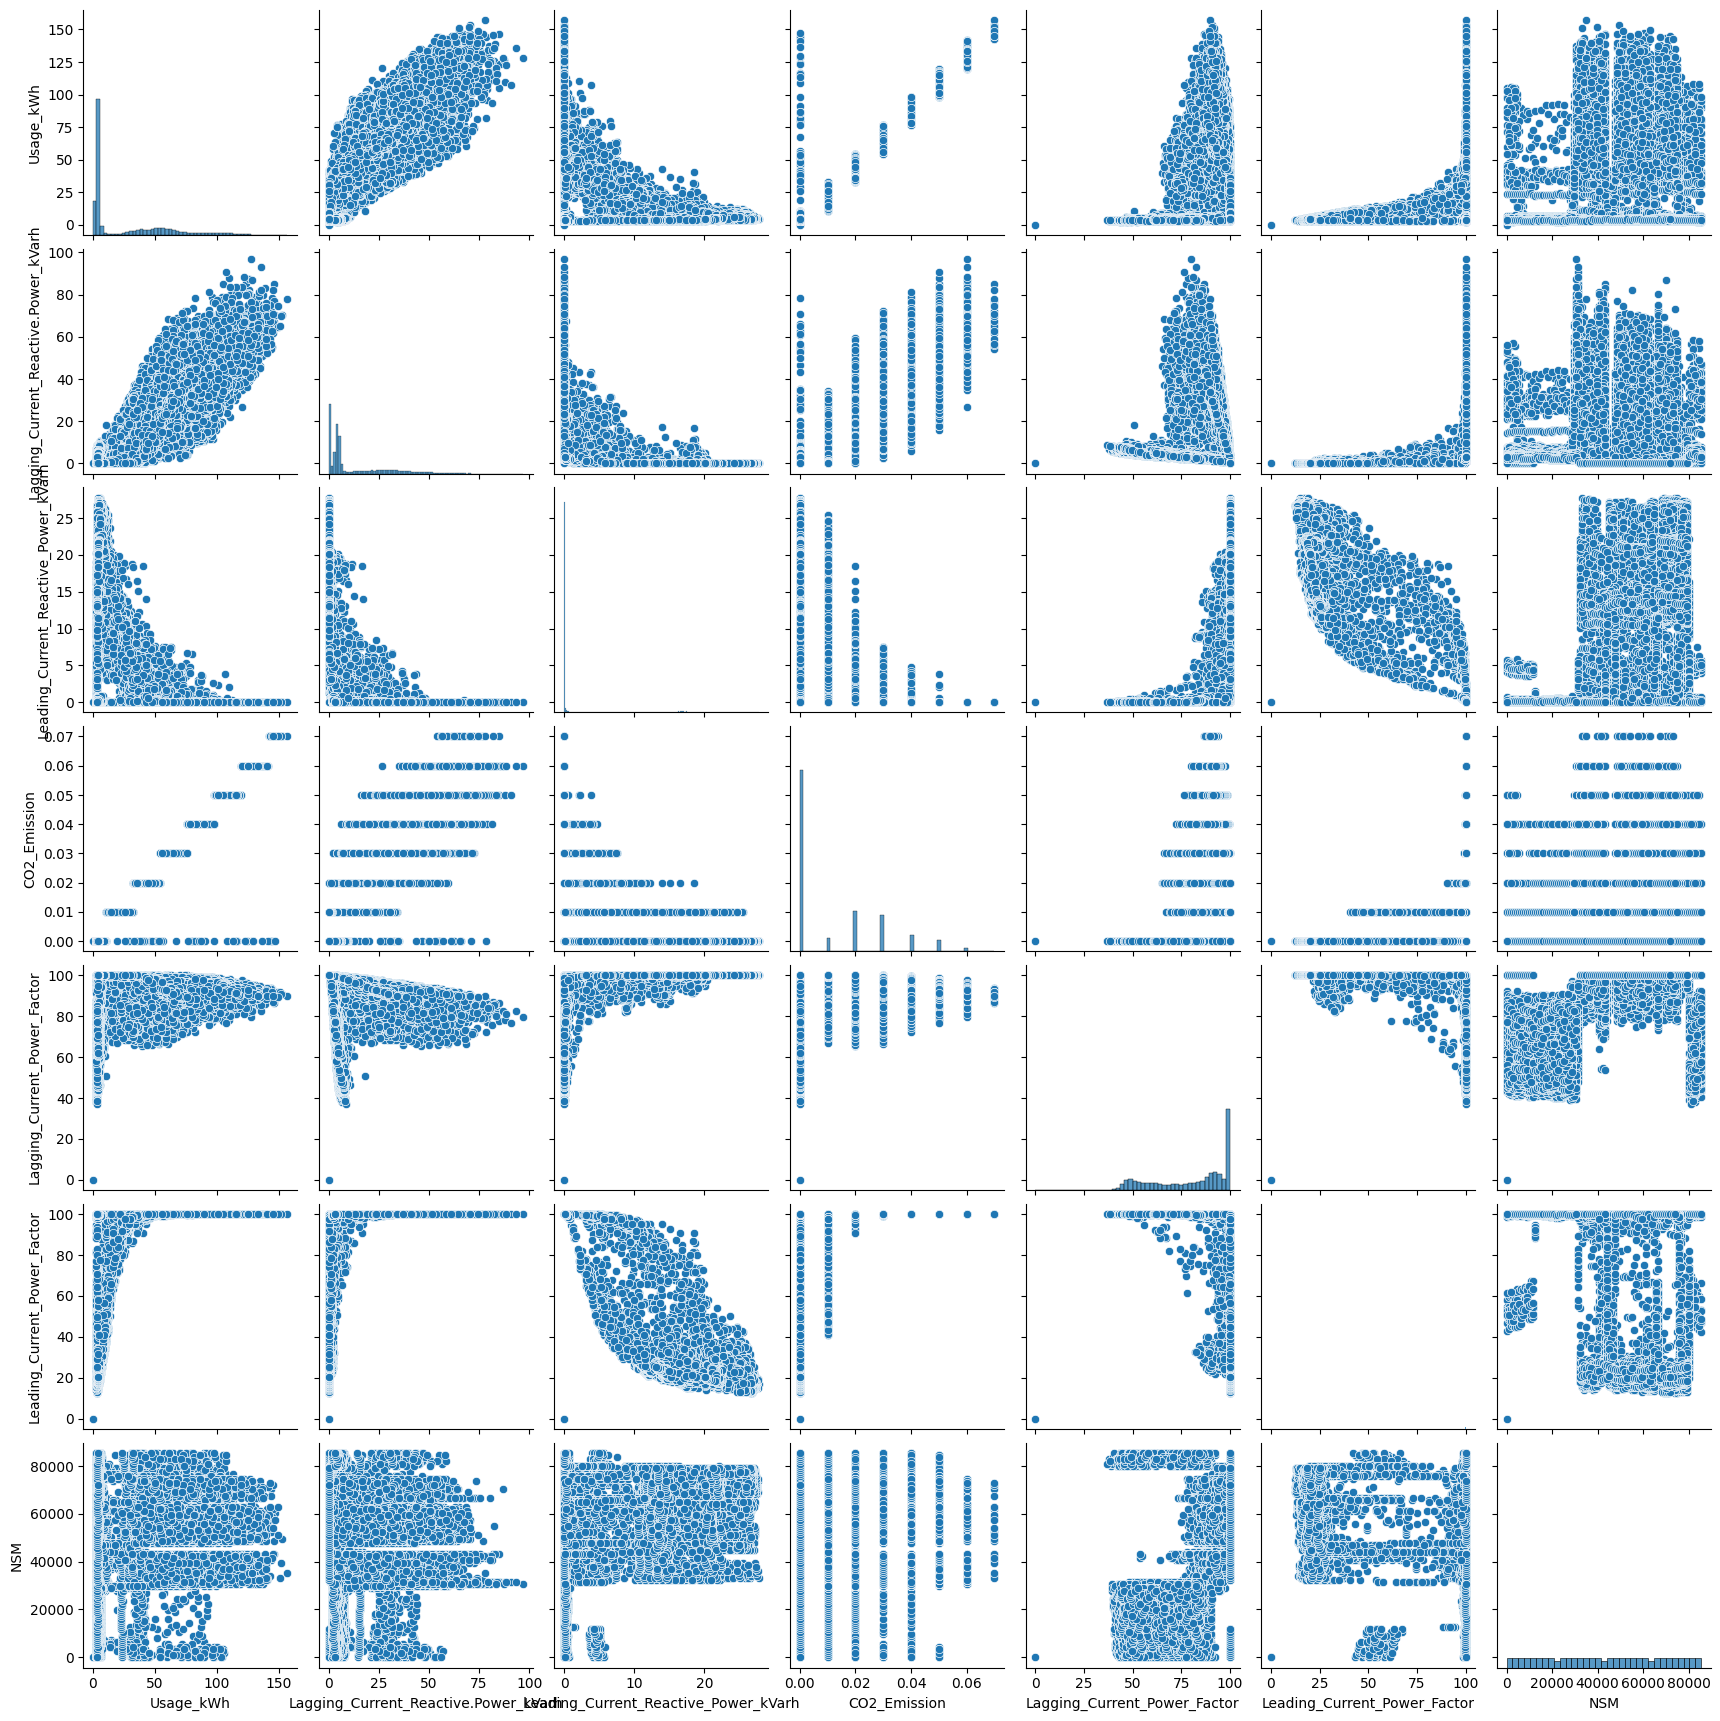

In [18]:
# Plot Pairplot
sns.pairplot(df[num_cols])
plt.show()

The above pairplot shows some of the features have a linear relationship.

In [19]:
# Extract features from Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [26]:
df.head(1)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2_Emission,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type,Date,Time,Month,Day,Day_sin,Day_cos
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,2023-01-01,00:15:00,1,6,-0.781831,0.62349


In [21]:
df['Day'] = df['Date'].dt.dayofweek

# Apply sine and cosine transformations for cyclical encoding of the day of the week
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 7)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 7)

In [22]:
df['Day'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int32)

In [23]:
print(df[['Date', 'Day', 'Day_sin', 'Day_cos']].head())

        Date  Day   Day_sin  Day_cos
0 2023-01-01    6 -0.781831  0.62349
1 2023-01-01    6 -0.781831  0.62349
2 2023-01-01    6 -0.781831  0.62349
3 2023-01-01    6 -0.781831  0.62349
4 2023-01-01    6 -0.781831  0.62349


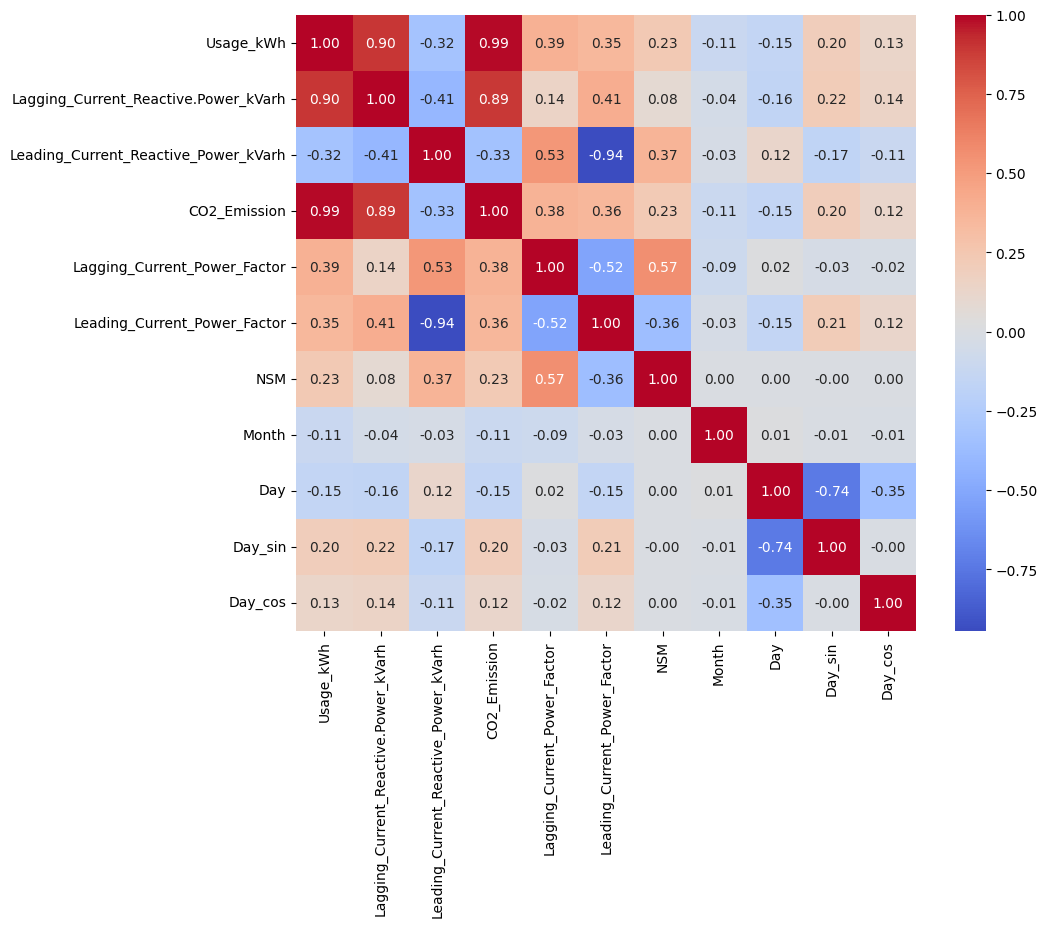

In [24]:
# Plot Correlation Matrix
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [25]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

X = df[numeric_cols]
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                                Feature         VIF
0                                 const  216.908885
1                             Usage_kWh   50.543794
2  Lagging_Current_Reactive.Power_kVarh    7.509507
3  Leading_Current_Reactive_Power_kVarh    9.756240
4                          CO2_Emission   43.231342
5          Lagging_Current_Power_Factor    3.976838
6          Leading_Current_Power_Factor   11.130189
7                                   NSM    1.526949
8                               Day_sin    1.087385
9                               Day_cos    1.031352


After analyzing the correlation matrix and calculating the Variance Inflation Factor (VIF) for features, I identified that the feature Leading_Current_Power_Factor exhibits a VIF of 11.13, marking it as one of the highest contributor to multicollinearity among the predictors. Additionally, this feature shows a high correlation with Leading_Current_Reactive_Power_kVarh, which further suggests redundancy.

Given the high VIF and correlation with another predictor, removing Leading_Current_Power_Factor is a reasonable step to reduce multicollinearity.

## Splitting data into Features and Target Variable

In [27]:
# Removing irrelevant features
x=df.drop(columns=['Leading_Current_Power_Factor','CO2_Emission','Date', 'Time', 'Day', 'Day_Of_Week', 'Month','WeekStatus','Day_sin','Day_cos','Load_Type'])
y=df['CO2_Emission']

## Splitting data into Training and Testing Set

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Model Building

# PCA and Linear Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

numeric_cols = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh',
                'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
                'NSM']

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson', standardize=False)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Create pipeline with PCA and Linear Regression
pipeline_1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  #
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline_1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Usage_kWh',
                                                   'Lagging_Current_Reactive.Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'NSM'])])),
                ('pca', PCA(n_components=0.95)),
                ('regressor', LinearRegression())])

In [33]:
y_pred=pipeline_1.predict(x_test)

Model Evaluation

In [34]:
n_train = x_train.shape[0]
n_test = x_test.shape[0]
p = x_train.shape[1]

train_score = r2_score(y_train, pipeline_1.predict(x_train))
test_score = r2_score(y_test, pipeline_1.predict(x_test))

adjusted_r2_train = 1 - (1 - train_score) * (n_train - 1) / (n_train - p - 1)
adjusted_r2_test = 1 - (1 - test_score) * (n_test - 1) / (n_test - p - 1)
mse = mean_squared_error(y_test, y_pred)

print("Training R^2:", train_score)
print("Training Adjusted R^2:", adjusted_r2_train)
print("Testing R^2:", test_score)
print("Testing Adjusted R^2:", adjusted_r2_test)
print("Mean Squared Error:", mse)

Training R^2: 0.8637756250505185
Training Adjusted R^2: 0.8637513218365477
Testing R^2: 0.8671887553266391
Testing Adjusted R^2: 0.8670939307909591
Mean Squared Error: 3.5509404886263204e-05


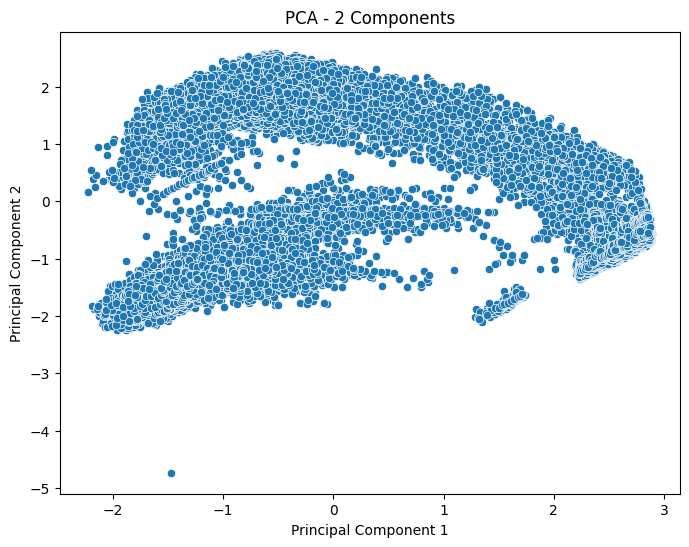

In [ ]:
x_transformed = preprocessor.fit_transform(x)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_transformed)
pca_df = pd.DataFrame(data=x_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The observed plot suggests a nonlinear trend in the data, indicating that a standard linear regression may not adequately capture the underlying relationship. To address this, we can introduce polynomial terms as additional predictors in the regression model, allowing for a more flexible fit.

# PCA and Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

numeric_cols = ['Usage_kWh','Lagging_Current_Reactive.Power_kVarh',
                'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor',
                'NSM']

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('power', PowerTransformer(method='yeo-johnson', standardize=False)),  # Correct skewness
    ('scaler', StandardScaler()),  # Standardize after skewness correction
    ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Apply PolynomialFeatures with degree 2
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
    ]
)

# Create pipeline with PCA and Polynomial Regression (degree 2)
pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline_2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['Usage_kWh',
                                                   'Lagging_Current_Reactive.Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'NSM'])])),
                ('pca', PCA(n_components=0.95)),
                ('regressor', LinearRegression())])

In [36]:
y_pred = pipeline_2.predict(x_test)

Model Evaluation

In [44]:
# Calculate adjusted R^2 scores for training and testing sets
n_train = x_train.shape[0]  # Number of training samples
n_test = x_test.shape[0]    # Number of testing samples
p = x_train.shape[1]        # Number of predictors/features

train_score = r2_score(y_train, pipeline_2.predict(x_train))
test_score = r2_score(y_test, pipeline_2.predict(x_test))

adjusted_r2_train = 1 - (1 - train_score) * (n_train - 1) / (n_train - p - 1)
adjusted_r2_test = 1 - (1 - test_score) * (n_test - 1) / (n_test - p - 1)
mse = mean_squared_error(y_test, y_pred)

print("Training R^2:", train_score)
print("Training Adjusted R^2:", adjusted_r2_train)
print("Testing R^2:", test_score)
print("Testing Adjusted R^2:", adjusted_r2_test)
print("Mean Squared Error:", mse)

Training R^2: 0.9377798033097924
Training Adjusted R^2: 0.9377687028679366
Testing R^2: 0.942295178786685
Testing Adjusted R^2: 0.9422539787144207
Mean Squared Error: 1.542839136394321e-05


The polynomial regression model has demonstrated improved results over the standard linear regression, effectively capturing the nonlinear patterns observed in the data. In both models, PCA was applied to reduce dimensionality, resulting in a more robust fit and improved model performance for the polynomial approach.

# Residual Plot

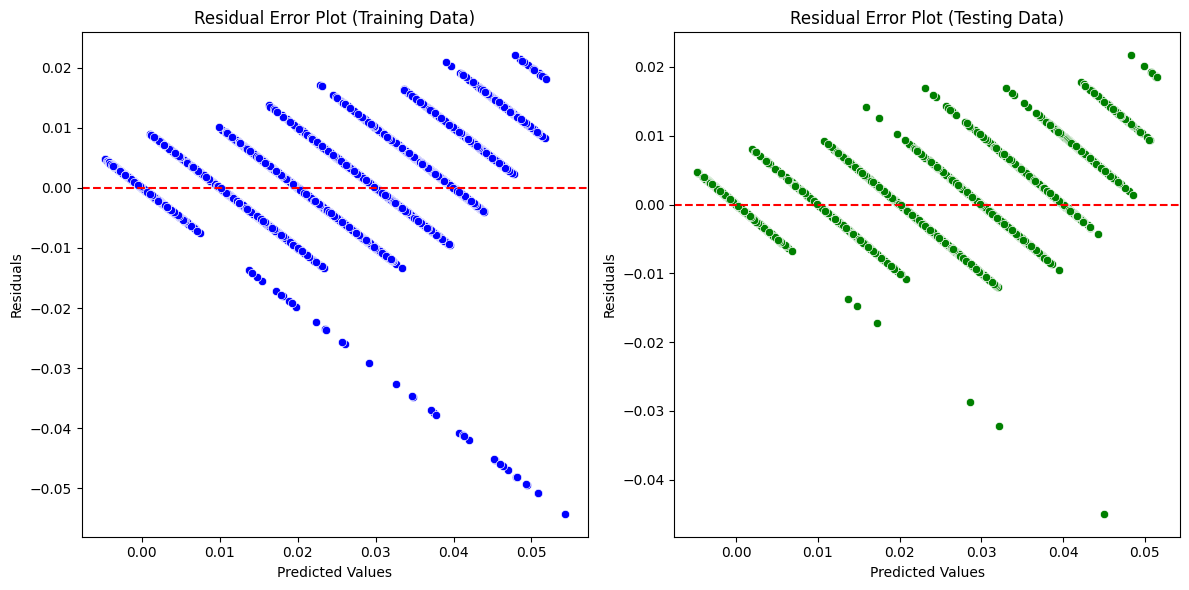

In [38]:
# Make predictions on the training and test data
y_train_pred = pipeline_2.predict(x_train)
y_test_pred = pipeline_2.predict(x_test)

# Calculate residuals for training and testing data
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Plot residual error for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train_pred, y=train_residuals, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Error Plot (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot residual error for testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=test_residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Error Plot (Testing Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [42]:
pipeline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer(standardize=False)),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['Usage_kWh',
                                                   'Lagging_Current_Reactive.Power_kVarh',
                                                   'Leading_Current_Reactive_Power_kVarh',
                                                   'Lagging_Current_Power_Factor',
                                                   'NSM'])])),
                ('pca', PCA(n_components=0.95)),
                ('regressor', LinearRegression())])

## Saving Model

In [46]:
with open('poly_regression_pipeline.pkl', 'wb') as f:
    cloudpickle.dump(pipeline_2, f)

## Conclusion

Here's a concise conclusion you can use in your Colab notebook:

---

### Conclusion
In this project, I applied data preprocessing and removed the highly correlated feature **Leading_Current_Power_Factor** to improve model accuracy. I used **Principal Component Analysis (PCA)** for dimensionality reduction, which helped capture key patterns in the dataset.

Two models were tested:
1. **PCA + Linear Regression**  
   - Adjusted R²: 0.86  
   - Mean Squared Error: 3.55

2. **PCA + Polynomial Regression (degree 2)**  
   - Adjusted R²: 0.94  
   - Mean Squared Error: 1.54  

Based on the improved metrics, **Polynomial Regression** was selected as it effectively captured the non-linear patterns in CO2 emissions, leading to a more accurate predictive model.